In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 14s 0us/step


In [4]:
train_x,val_x,train_y,val_y = train_test_split(x_train, y_train, train_size=0.8)

In [5]:
from keras.utils import to_categorical
x_train = x_train / 255.0
x_test = x_test / 255.0
val_x = val_x / 255.0
train_x = train_x / 255.0

y_train = to_categorical(y_train, num_classes=100)
train_y=to_categorical(train_y,num_classes=100)
val_y=to_categorical(val_y,num_classes=100)
y_test=to_categorical(y_test,num_classes=100)


Model 1

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=20, batch_size=128, validation_data=(val_x, val_y))

val_loss, val_acc = model.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

Epoch 1/20
313/313 [==============================] - 14s 9ms/step - loss: 3.8657 - accuracy: 0.1159 - val_loss: 3.4067 - val_accuracy: 0.1917
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 3.1134 - accuracy: 0.2415 - val_loss: 3.0284 - val_accuracy: 0.2554
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 2.7721 - accuracy: 0.3065 - val_loss: 2.8567 - val_accuracy: 0.2826
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 2.5341 - accuracy: 0.3550 - val_loss: 2.7861 - val_accuracy: 0.3064
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 2.3430 - accuracy: 0.3948 - val_loss: 2.7012 - val_accuracy: 0.3264
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 2.1672 - accuracy: 0.4315 - val_loss: 2.6883 - val_accuracy: 0.3288
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.9930 - accuracy: 0.4709 - val_loss: 2.6505 - val_accuracy: 0.3468
Epoch

Model 2

In [7]:
from keras.layers import BatchNormalization

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.fit(train_x, train_y, epochs=20, batch_size=128, validation_data=(val_x, val_y))

val_loss, val_acc = model_2.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

Epoch 1/20
313/313 [==============================] - 7s 14ms/step - loss: 4.3539 - accuracy: 0.0812 - val_loss: 5.2951 - val_accuracy: 0.0328
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 3.5316 - accuracy: 0.1685 - val_loss: 3.3922 - val_accuracy: 0.1903
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 3.1650 - accuracy: 0.2276 - val_loss: 3.0594 - val_accuracy: 0.2593
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 2.9327 - accuracy: 0.2724 - val_loss: 2.9824 - val_accuracy: 0.2697
Epoch 5/20
313/313 [==============================] - 4s 11ms/step - loss: 2.7941 - accuracy: 0.3001 - val_loss: 2.7364 - val_accuracy: 0.3116
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 2.6818 - accuracy: 0.3212 - val_loss: 2.8867 - val_accuracy: 0.2926
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 2.5981 - accuracy: 0.3410 - val_loss: 2.5908 - val_accuracy: 0.3440

Model 3

In [8]:
from keras.layers import BatchNormalization

model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='elu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='elu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_3.fit(train_x, train_y, epochs=20, batch_size=128, validation_data=(val_x, val_y))

val_loss, val_acc = model_3.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

Epoch 1/20
313/313 [==============================] - 9s 14ms/step - loss: 4.5283 - accuracy: 0.0595 - val_loss: 5.3233 - val_accuracy: 0.0326
Epoch 2/20
313/313 [==============================] - 4s 11ms/step - loss: 3.7750 - accuracy: 0.1232 - val_loss: 3.8759 - val_accuracy: 0.1243
Epoch 3/20
313/313 [==============================] - 4s 11ms/step - loss: 3.4156 - accuracy: 0.1768 - val_loss: 3.3816 - val_accuracy: 0.1904
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 3.1771 - accuracy: 0.2171 - val_loss: 3.0810 - val_accuracy: 0.2314
Epoch 5/20
313/313 [==============================] - 4s 11ms/step - loss: 3.0129 - accuracy: 0.2462 - val_loss: 2.8807 - val_accuracy: 0.2695
Epoch 6/20
313/313 [==============================] - 4s 11ms/step - loss: 2.9069 - accuracy: 0.2700 - val_loss: 3.1444 - val_accuracy: 0.2319
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 2.8131 - accuracy: 0.2889 - val_loss: 2.6437 - val_accuracy: 0.3227

Model 4

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

# Create data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

model_4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Compile the model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with data augmentation
history = model_4.fit(datagen.flow(train_x, train_y, batch_size=64),
                    steps_per_epoch=len(train_x) / 64, epochs=50, 
                    validation_data=(val_x, val_y))


Epoch 1/50
625/625 [==============================] - 27s 36ms/step - loss: 4.3666 - accuracy: 0.0742 - val_loss: 3.9694 - val_accuracy: 0.0870
Epoch 2/50
625/625 [==============================] - 22s 36ms/step - loss: 3.6902 - accuracy: 0.1365 - val_loss: 3.3461 - val_accuracy: 0.2108
Epoch 3/50
625/625 [==============================] - 22s 36ms/step - loss: 3.4169 - accuracy: 0.1802 - val_loss: 3.0747 - val_accuracy: 0.2353
Epoch 4/50
625/625 [==============================] - 22s 36ms/step - loss: 3.2517 - accuracy: 0.2041 - val_loss: 2.9896 - val_accuracy: 0.2646
Epoch 5/50
625/625 [==============================] - 22s 36ms/step - loss: 3.1468 - accuracy: 0.2267 - val_loss: 2.7333 - val_accuracy: 0.3045
Epoch 6/50
625/625 [==============================] - 22s 36ms/step - loss: 3.0435 - accuracy: 0.2456 - val_loss: 2.9393 - val_accuracy: 0.2686
Epoch 7/50
625/625 [==============================] - 22s 36ms/step - loss: 2.9797 - accuracy: 0.2548 - val_loss: 2.6637 - val_accuracy:

In [9]:
val_loss, val_acc = model_4.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.1899 - accuracy: 0.4266
Validation accuracy: 0.42660000920295715


Model 5

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


model_5 = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=val_x.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with data augmentation
history = model_5.fit(datagen.flow(train_x, train_y, batch_size=64),
                    steps_per_epoch=len(train_x) / 64, epochs=50, 
                    validation_data=(val_x, val_y))
val_loss, val_acc = model_5.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

Epoch 1/50
625/625 [==============================] - 26s 37ms/step - loss: 4.2770 - accuracy: 0.0980 - val_loss: 3.5386 - val_accuracy: 0.1649
Epoch 2/50
625/625 [==============================] - 22s 36ms/step - loss: 3.4583 - accuracy: 0.1907 - val_loss: 2.9848 - val_accuracy: 0.2726
Epoch 3/50
625/625 [==============================] - 22s 36ms/step - loss: 3.1054 - accuracy: 0.2442 - val_loss: 2.6834 - val_accuracy: 0.3333
Epoch 4/50
625/625 [==============================] - 23s 36ms/step - loss: 2.9182 - accuracy: 0.2844 - val_loss: 2.7839 - val_accuracy: 0.3108
Epoch 5/50
625/625 [==============================] - 23s 36ms/step - loss: 2.7871 - accuracy: 0.3056 - val_loss: 2.5869 - val_accuracy: 0.3498
Epoch 6/50
625/625 [==============================] - 22s 36ms/step - loss: 2.6858 - accuracy: 0.3259 - val_loss: 2.4377 - val_accuracy: 0.3759
Epoch 7/50
625/625 [==============================] - 22s 36ms/step - loss: 2.6174 - accuracy: 0.3413 - val_loss: 2.3555 - val_accuracy:

Model 6

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


model_6 = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=val_x.shape[1:]),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    #Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with data augmentation
history = model_6.fit(datagen.flow(train_x, train_y, batch_size=64),
                    steps_per_epoch=len(train_x) / 64, epochs=50, 
                    validation_data=(val_x, val_y))
val_loss, val_acc = model_5.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

Epoch 1/50
625/625 [==============================] - 28s 37ms/step - loss: 4.2067 - accuracy: 0.0750 - val_loss: 3.5810 - val_accuracy: 0.1522
Epoch 2/50
625/625 [==============================] - 23s 36ms/step - loss: 3.6097 - accuracy: 0.1467 - val_loss: 3.3920 - val_accuracy: 0.1898
Epoch 3/50
625/625 [==============================] - 23s 36ms/step - loss: 3.2870 - accuracy: 0.2035 - val_loss: 3.0557 - val_accuracy: 0.2366
Epoch 4/50
625/625 [==============================] - 23s 36ms/step - loss: 3.0665 - accuracy: 0.2447 - val_loss: 3.1689 - val_accuracy: 0.2362
Epoch 5/50
625/625 [==============================] - 23s 36ms/step - loss: 2.8857 - accuracy: 0.2763 - val_loss: 2.8618 - val_accuracy: 0.2886
Epoch 6/50
625/625 [==============================] - 23s 36ms/step - loss: 2.7670 - accuracy: 0.2998 - val_loss: 2.4295 - val_accuracy: 0.3737
Epoch 7/50
625/625 [==============================] - 23s 36ms/step - loss: 2.6184 - accuracy: 0.3313 - val_loss: 2.3636 - val_accuracy:

In [30]:
val_loss, val_acc = model_6.evaluate(val_x, val_y)
print('Validation accuracy:', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.8586
Validation accuracy: 0.8586000204086304


**Top 3 Models:**


1.   Model 6 (Val accuracy: 0.8586000204086304)
2.   Model 5 (Val accuracy: 0.5066999793052673)
3.   Model 4 (Val accuracy: 0.42660000920295715)



Training **Model 6** on whole dataset

In [13]:
model_6.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64, epochs=50)

Epoch 1/50
781/781 [==============================] - 28s 36ms/step - loss: 1.3728 - accuracy: 0.6156
Epoch 2/50
781/781 [==============================] - 27s 35ms/step - loss: 1.3369 - accuracy: 0.6242
Epoch 3/50
781/781 [==============================] - 27s 35ms/step - loss: 1.3334 - accuracy: 0.6247
Epoch 4/50
781/781 [==============================] - 27s 35ms/step - loss: 1.3266 - accuracy: 0.6250
Epoch 5/50
781/781 [==============================] - 27s 35ms/step - loss: 1.2979 - accuracy: 0.6292
Epoch 6/50
781/781 [==============================] - 27s 35ms/step - loss: 1.2725 - accuracy: 0.6377
Epoch 7/50
781/781 [==============================] - 27s 35ms/step - loss: 1.2688 - accuracy: 0.6385
Epoch 8/50
781/781 [==============================] - 27s 35ms/step - loss: 1.2473 - accuracy: 0.6418
Epoch 9/50
781/781 [==============================] - 27s 35ms/step - loss: 1.2348 - accuracy: 0.6456
Epoch 10/50
781/781 [==============================] - 27s 35ms/step - loss: 1.217

In [14]:
val_loss, val_acc = model_6.evaluate(x_test, y_test)
print('Validation accuracy:', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.5166 - accuracy: 0.6269
Validation accuracy: 0.6269000172615051


In [19]:
model_6.save('my_model_6.h5')

Training **Model 5** on whole dataset

In [15]:
model_5.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64, epochs=50)

Epoch 1/50
781/781 [==============================] - 27s 35ms/step - loss: 2.0297 - accuracy: 0.4730
Epoch 2/50
781/781 [==============================] - 27s 35ms/step - loss: 2.0195 - accuracy: 0.4738
Epoch 3/50
781/781 [==============================] - 27s 35ms/step - loss: 2.0015 - accuracy: 0.4797
Epoch 4/50
781/781 [==============================] - 27s 35ms/step - loss: 1.9969 - accuracy: 0.4796
Epoch 5/50
781/781 [==============================] - 27s 35ms/step - loss: 2.0067 - accuracy: 0.4757
Epoch 6/50
781/781 [==============================] - 27s 35ms/step - loss: 1.9896 - accuracy: 0.4815
Epoch 7/50
781/781 [==============================] - 27s 35ms/step - loss: 1.9940 - accuracy: 0.4799
Epoch 8/50
781/781 [==============================] - 27s 35ms/step - loss: 1.9804 - accuracy: 0.4803
Epoch 9/50
781/781 [==============================] - 27s 35ms/step - loss: 1.9713 - accuracy: 0.4862
Epoch 10/50
781/781 [==============================] - 27s 35ms/step - loss: 1.972

In [16]:
val_loss, val_acc = model_5.evaluate(x_test, y_test)
print('Validation accuracy:', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.6840 - accuracy: 0.5591
Validation accuracy: 0.5590999722480774


In [20]:
model_5.save('my_model_5.h5')

Training **Model 4** on whole dataset

In [17]:
model_4.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64, epochs=50)

Epoch 1/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3946 - accuracy: 0.3795
Epoch 2/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3908 - accuracy: 0.3806
Epoch 3/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3879 - accuracy: 0.3780
Epoch 4/50
781/781 [==============================] - 27s 35ms/step - loss: 2.3805 - accuracy: 0.3828
Epoch 5/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3576 - accuracy: 0.3859
Epoch 6/50
781/781 [==============================] - 27s 35ms/step - loss: 2.3576 - accuracy: 0.3861
Epoch 7/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3519 - accuracy: 0.3870
Epoch 8/50
781/781 [==============================] - 27s 35ms/step - loss: 2.3425 - accuracy: 0.3907
Epoch 9/50
781/781 [==============================] - 28s 35ms/step - loss: 2.3415 - accuracy: 0.3919
Epoch 10/50
781/781 [==============================] - 28s 35ms/step - loss: 2.330

In [18]:
val_loss, val_acc = model_4.evaluate(x_test, y_test)
print('Validation accuracy:', val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8562 - accuracy: 0.4956
Validation accuracy: 0.49559998512268066


In [21]:
model_4.save('my_model_4.h5')

Plotting the Models

In [22]:
from keras.utils import plot_model

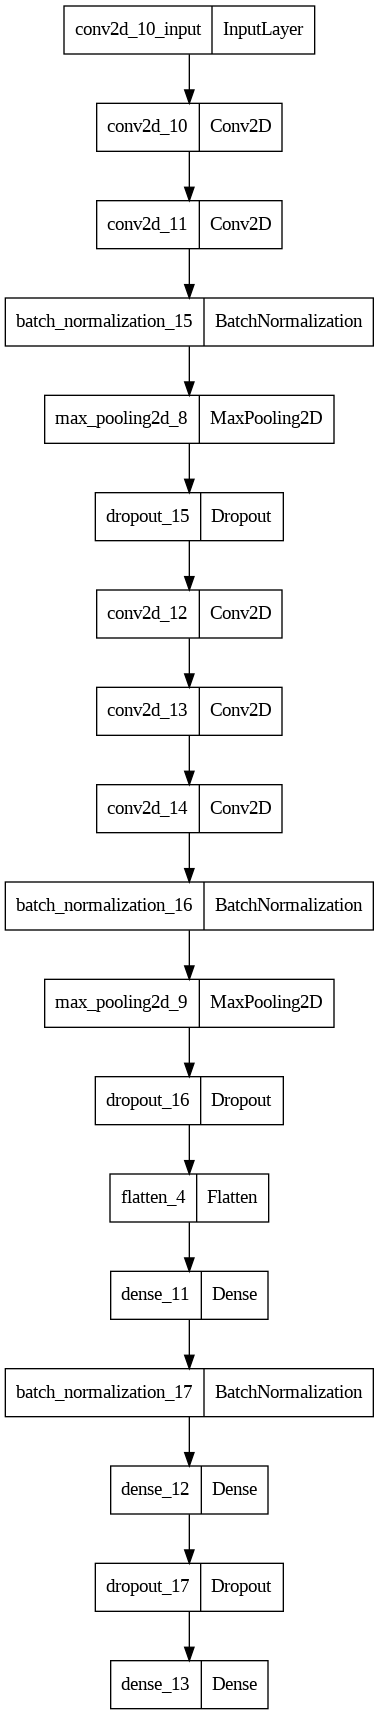

In [23]:
plot_model(model_6,to_file='model_6.png')

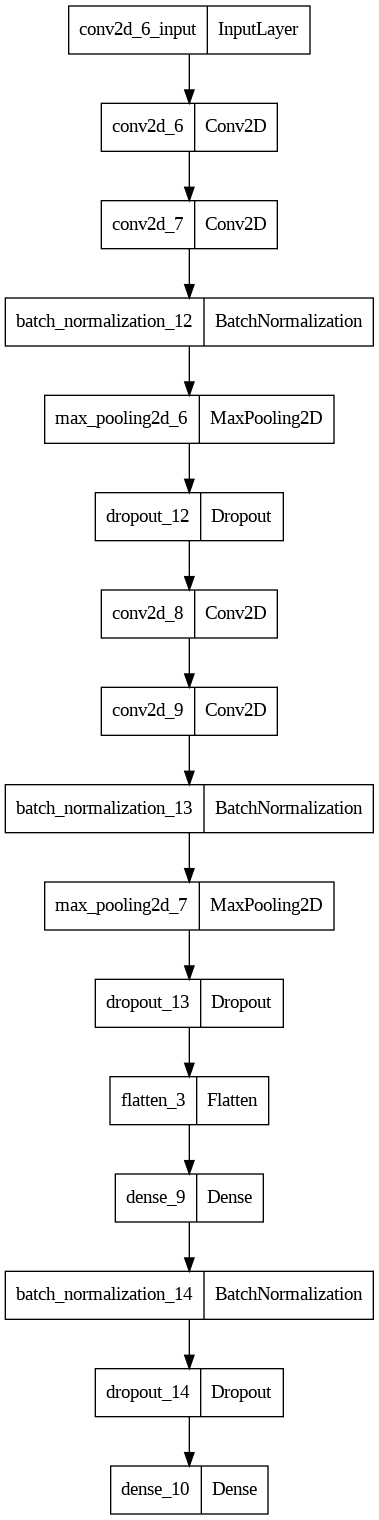

In [24]:
plot_model(model_5,to_file='model_5.png')

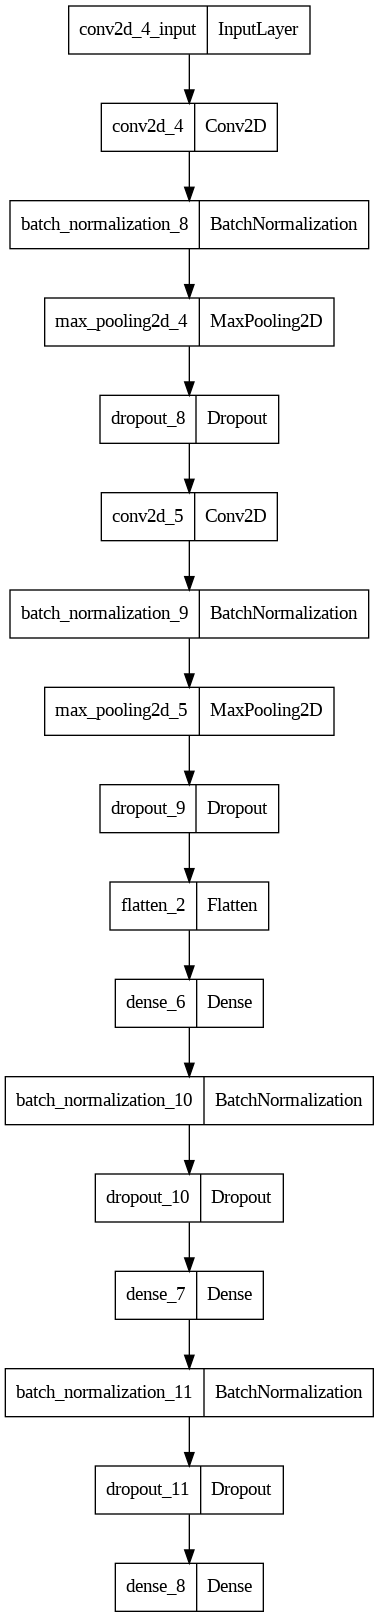

In [25]:
plot_model(model_4,to_file='model_4.png')

In [27]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 128)      

In [28]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)       

In [29]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 64)      